In [117]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

Método para la solución numérica

In [118]:
#Acá se eligen los parametros que desee poner el usuario
#Longitud de la malla en x
N=59
#Longitud de la malla en y
M=65
#Paso entre cada punto de la malla
dx=0.1
#Voltaje para as condiciones de frontera dadas
vi=5
#Esta función recibe los parámetros que se asignan arriba (N,M,vi,dx)
def Potencial(N,M,dx,vi):
    #Creamos valores para el último punto de la red en x y y
    a=N*dx
    b=M*dx
    #Creamos arrays para guardar los valores de x y y
    x=np.linspace(0,a,N)
    y=np.linspace(0,b,M)
    #Creamos la red de dimensiones NxM con valores arbitrarios de -1 a 1
    V=np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            V[i,j]=np.random.uniform(-1,1)
    #Imponemos las condiciones de frontera
    V[0,:]=0
    V[-1,:]=0
    V[:,0]=-vi
    V[:,-1]=vi
    #Creamos un método de relajación y el método de Gauss Seidel
    #Asemos un contador para la diferencia máxima
    dife_max=0.
    #Imponemos un número de iteraciones máximo
    N_it=int(1e4)
    #Imponemos el valor de toleracia que aguanta el método de relajación
    tolerancia=1e-5
    for ite in tqdm(range(N_it)):
    #Recorremos solo el interior de la red para no alterar las fronteras
        for i in range(1,N-1):
            for j in range(1,M-1):
    #Actualizamos cada punto con el promedio de sus vecinos
                promedio_= (V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])/4
    #Creamos una matriz representando el cambió de matriz en cada iteración
                D=promedio_-V[i,j]
                # Actualizamos la red
                V[i,j]=promedio_
    #Comparamos la diferencia máxima con el cambio de la red y si esta es menor a la tolerancia, se detinen las iteraciones
                if np.abs(D)>dife_max:
                    dmax=D
        if np.abs(dmax)<tolerancia:
            break
    return V,a,b,x,y
#La función devuelve el potencial, a, b, x y y. Estos último para poder usarse en el Test

Test método numérico vs. analítico

In [119]:
#Implementamos método numérico para hallar el potencial numérico (Vn)
V_num,a,b,x,y=Potencial(N,M,dx,vi)
#Creamos un meshgrid para crear el plano X-Y
X,Y = np.meshgrid(x,y)
#Calculamos el potencial de forma analítica (V_anal) con los primeros 199 términos (después de 200 el código no funciona)
#Esta función recibe los valores del meshgrid, vi, a, b y devuelve el potencial calculado
def Potencial_Anal(X,Y,vi,a,b):
    u=np.zeros_like(X)
    for n in range(1,200,2):
        u+=np.sin(np.pi*n*X/a)*(((1+np.cosh(np.pi*n*b/a))/np.sinh(np.pi*n*b/a))*np.sinh(np.pi*n*Y/a)-np.cosh(np.pi*n*Y/a))/n
    Va=u*4*vi/np.pi
    return Va
V_anal=Potencial_Anal(X,Y,vi,a,b)

  4%|▎         | 365/10000 [00:04<02:03, 78.31it/s]


array([[ 0.00000000e+00, -5.07238055e+00, -5.13678464e+00, ...,
        -5.13678464e+00, -5.07238055e+00, -7.55131202e-14],
       [ 0.00000000e+00, -2.49976791e+00, -3.52065709e+00, ...,
        -3.52065709e+00, -2.49976791e+00, -4.66307115e-15],
       [ 0.00000000e+00, -1.47232871e+00, -2.49146549e+00, ...,
        -2.49146549e+00, -1.47232871e+00, -2.01221004e-15],
       ...,
       [ 0.00000000e+00,  1.03652671e+00,  1.99955531e+00, ...,
         1.99955531e+00,  1.03652671e+00,  1.05512818e-15],
       [ 0.00000000e+00,  1.31150902e+00,  2.51518644e+00, ...,
         2.51518644e+00,  1.31150902e+00,  1.28136497e-15],
       [ 0.00000000e+00,  1.69655522e+00,  3.23321385e+00, ...,
         3.23321385e+00,  1.69655522e+00,  1.63644555e-15]])

Text(0.5, 0, 'Potencial Eléctrico')

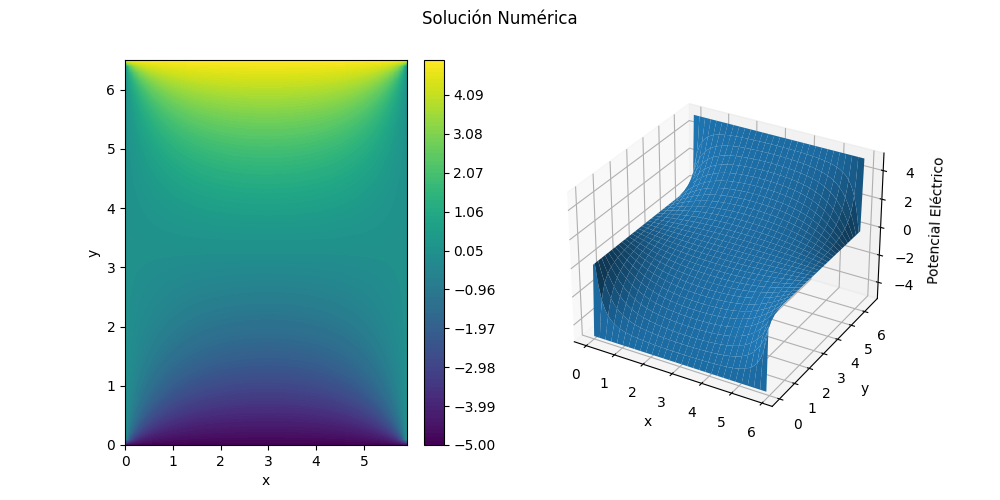

In [123]:
#Graficamos la solución numérica
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122, projection='3d')
fig.suptitle("Solución Numérica")
levels=np.linspace(V_num.min()-1e-5,V_num.max()+1e-5,100)
c=ax.contourf(X,Y,V_num.T,levels=levels)
cbar=fig.colorbar(c)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax1.plot_surface(X,Y,Vn.T)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Potencial Eléctrico")

Text(0.5, 0, 'Potencial Eléctrico')

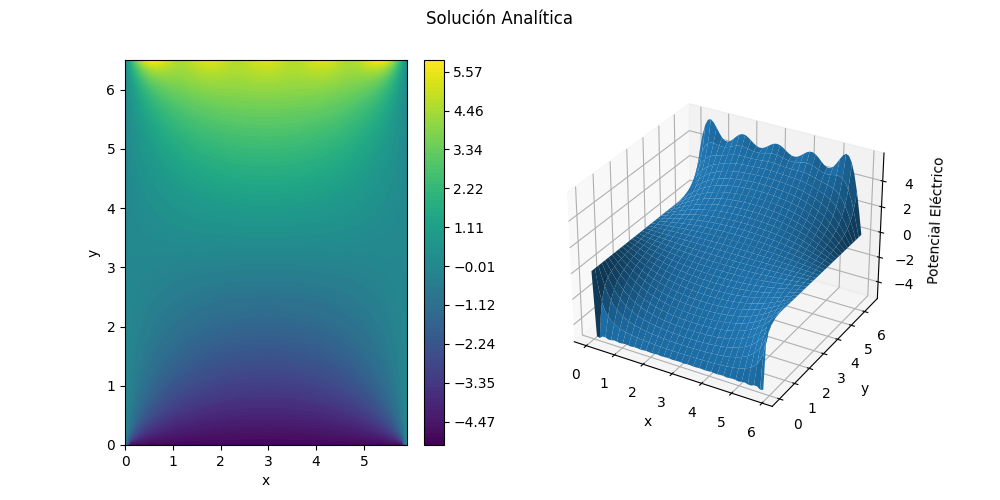

In [124]:
#Graficamos la solución analítica a orden 199
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122, projection='3d')
fig.suptitle("Solución Analítica")
levels=np.linspace(V_anal.min()-1e-5,V_anal.max()+1e-5,100)
c=ax.contourf(X,Y,V_anal,levels=levels)
cbar=fig.colorbar(c)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax1.plot_surface(X,Y,V_anal)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Potencial Eléctrico")

Text(0.5, 0, 'Residuos')

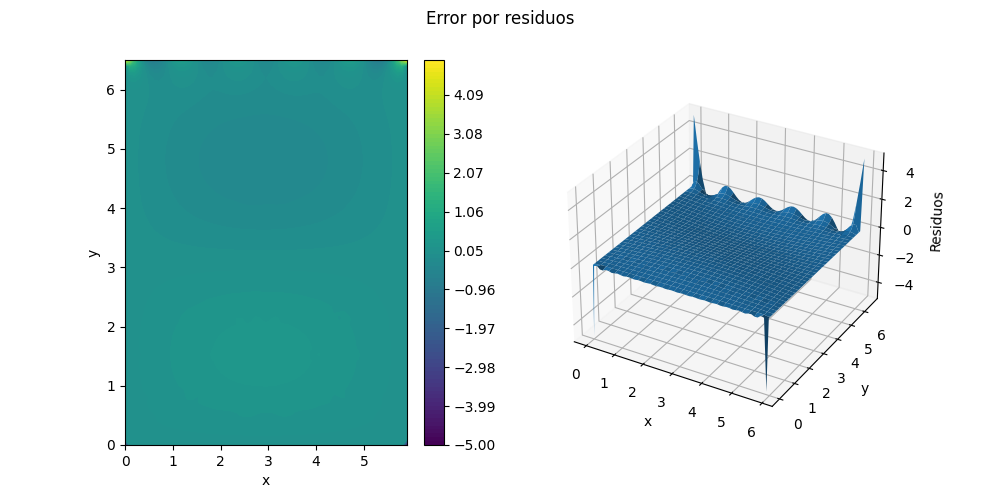

In [125]:
#Calculamos y graficamos el error por residuos
error=V_num.T-V_anal
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122, projection='3d')
fig.suptitle("Error por residuos")
levels=np.linspace(error.min()-1e-5,error.max()+1e-5,100)
c=ax.contourf(X,Y,error,levels=levels)
cbar=fig.colorbar(c)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax1.plot_surface(X,Y,error)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Residuos")